# 共享单车预测作业

请在 Capital Bikeshare （美国 Washington, D.C.的一个共享单车公司）提供的自行车数据上进行回归分析。训练数据为 2011 年的数据，要求预测 2012 年每天的单车共享数量。

## 导入数据

In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# 读取csv数据，相对路径
data = pd.read_csv("day.csv")

# 查看前10行数据
data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [4]:
data.shape

(731, 16)

## 数据探索 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


查看各特征数据的类型，其中日期是数据时间类别

In [6]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

查看数据中是否有空值，若有空值则需要进行处理，从结果看该数据并没有空值，空值的处理办法：(1) 拟合，(2)众数，(3) 均值

In [7]:
# 查看数据各统计特性，包括均值，标准差，最小值，最大值，1/4分位数（25%）、中位数（50%）、3/4分位数（75%）、
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


根据数据的情况可得到如下分析：

1) windspeed 3/4分位数为0.233214，最大值0.50743说明风速特征数据相对分散

2) casual regitered两个输出数据也是比较分散

针对上面的分散的数据在后面需要进行标准化处理

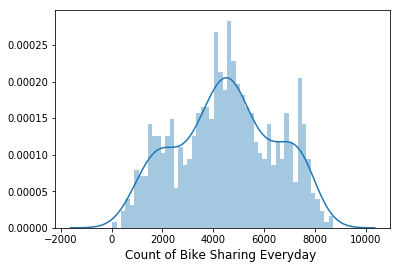

In [10]:
fig = plt.figure()
# kde 参数是否是需要拟合，True表示需要拟合，图像上线拟合出来概率密度函数
sns.distplot(data.cnt,bins=50,kde=True)
plt.xlabel("Count of Bike Sharing Everyday ",fontsize=12)
plt.show()

Text(0.5,0,'Distribute of Count')

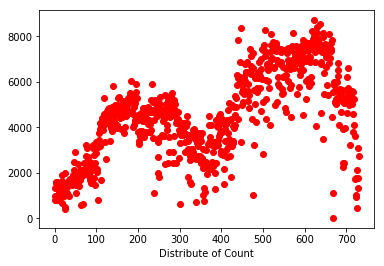

In [11]:
plt.scatter(range(data.shape[0]),data.cnt.values,color="red")
plt.xlabel("Distribute of Count")            

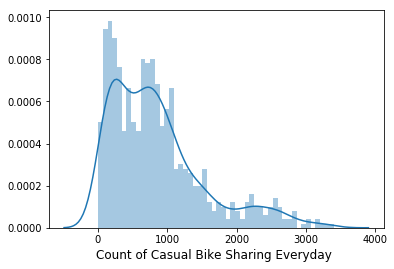

In [12]:
fig = plt.figure()
# kde 参数是否是需要拟合，True表示需要拟合，图像上线拟合出来概率密度函数
sns.distplot(data.casual,bins=50,kde=True)
plt.xlabel("Count of Casual Bike Sharing Everyday ",fontsize=12)
plt.show()

Text(0.5,0,'Distribute of Casual Count')

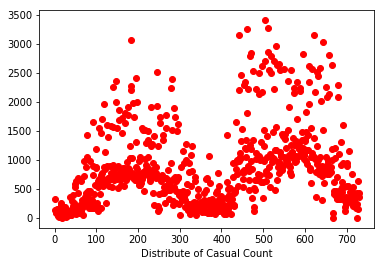

In [13]:
plt.scatter(range(data.shape[0]),data.casual,color="red")
plt.xlabel("Distribute of Casual Count")

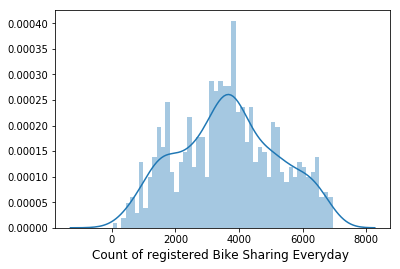

In [14]:
fig = plt.figure()
# kde 参数是否是需要拟合，True表示需要拟合，图像上线拟合出来概率密度函数
sns.distplot(data.registered,bins=50,kde=True)
plt.xlabel("Count of registered Bike Sharing Everyday ",fontsize=12)
plt.show()

Text(0.5,0,'Distribute of registered Count')

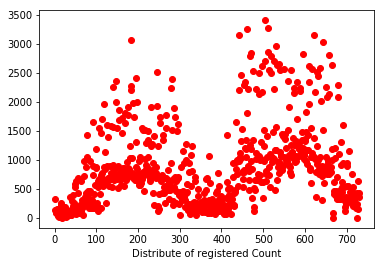

In [15]:
plt.scatter(range(data.shape[0]),data.casual,color="red")
plt.xlabel("Distribute of registered Count")

图形上看有两个峰值，结合数据看第二段数据在于2012年整体高于2011年的数据

cnt,registered,casual数据类似正态分布，但casual数据右边尾部长，cnt,registered数据数据波动比较大

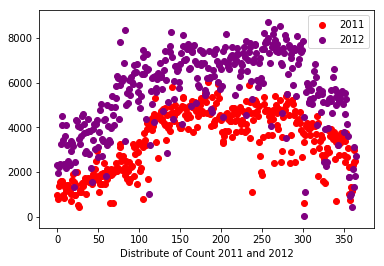

In [20]:
trainData = data[data.yr == 0]
testData = data[data.yr == 1]
# 绘制2011年的Sharing Bike的数量分布
plt.figure()
plt.scatter(range(trainData.shape[0]),trainData.cnt.values,color="red")
# 绘制2012年的Sharing Bike的数量分布
plt.scatter(range(testData.shape[0]),testData.cnt.values,color="purple")
plt.xlabel("Distribute of Count 2011 and 2012")
plt.legend(labels = ['2011', '2012'],loc="best")

In [21]:
trainData['cnt'].describe()
# trainData['casual'].describe()
# trainData['registered'].describe()

count     365.000000
mean     3405.761644
std      1378.753666
min       431.000000
25%      2132.000000
50%      3740.000000
75%      4586.000000
max      6043.000000
Name: cnt, dtype: float64

In [22]:
testData['cnt'].describe()

count     366.000000
mean     5599.934426
std      1788.667868
min        22.000000
25%      4369.000000
50%      5927.000000
75%      7011.250000
max      8714.000000
Name: cnt, dtype: float64

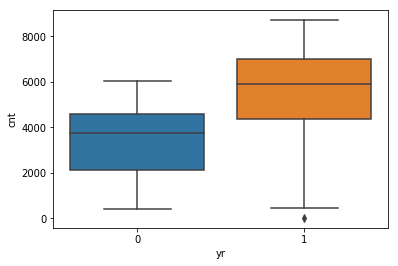

In [23]:
# 查看cnt的箱线图
ax = sns.boxplot(x="yr",y="cnt",data=data)

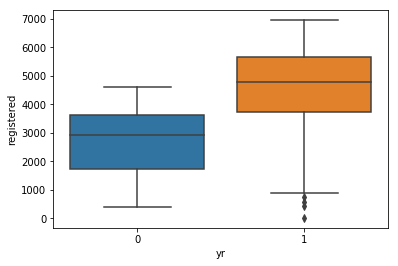

In [24]:
# 查看registered的箱线图
ax = sns.boxplot(x="yr",y="registered",data=data)

从数据来看2012年的共享单车的日平均数量要比2011年的共享单车的日平均数量要大，根据箱体图，以及散点图，去除一定离群值，去除条件如下

1) cnt小于500

2) 2011年casual大于3000

3) 2012年resistered小于1000

In [25]:
data = data[data.cnt > 1000]

In [26]:
data = data[(data.yr==1)|(data.casual<3000)]

In [27]:
data = data[(data.yr==0)|(data.registered>1000)]

In [28]:
data.shape

(709, 16)

In [29]:
trainData = data[data.yr == 0]
testData = data[data.yr == 1]

先观察连续性数据直方图

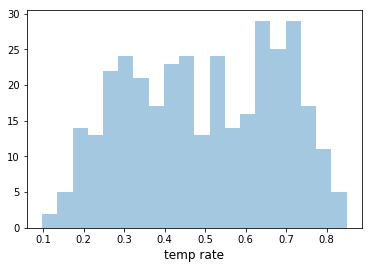

In [30]:
fig = plt.figure()
sns.distplot(trainData.temp.values, bins=20, kde=False)
plt.xlabel('temp rate', fontsize=12)
plt.show()

从分布图上看温度和正太分布比较接近，只有中间的部分相对凹陷

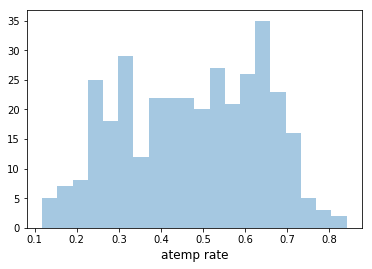

In [31]:
fig = plt.figure()
sns.distplot(trainData.atemp.values, bins=20, kde=False)
plt.xlabel('atemp rate', fontsize=12)
plt.show()

体感温度的分布图形与温度相似，符合正常情况，温度与体感温度有一定线性关系存在

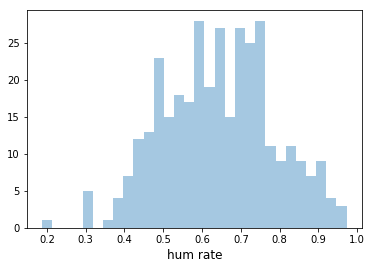

In [32]:
fig = plt.figure()
sns.distplot(trainData.hum.values, bins=30, kde=False)
plt.xlabel('hum rate', fontsize=12)
plt.show()

湿度的分布符合正态分布，但中心偏右

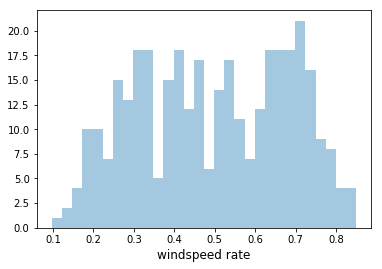

In [33]:
fig = plt.figure()
sns.distplot(trainData.temp.values, bins=30, kde=False)
plt.xlabel('windspeed rate', fontsize=12)
plt.show()

风力情况分布图形与温度类似，中间凹陷

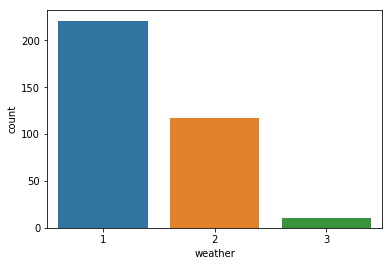

In [34]:
sns.countplot(trainData.weathersit);
plt.xlabel('weather');

Text(0.5,0,'mnth')

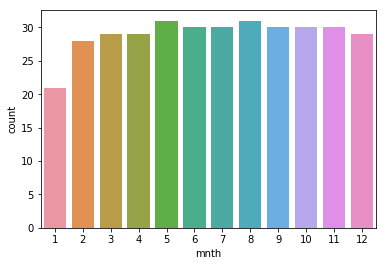

In [35]:
sns.countplot(trainData.mnth)
plt.xlabel("mnth")

Text(0.5,0,'holiday')

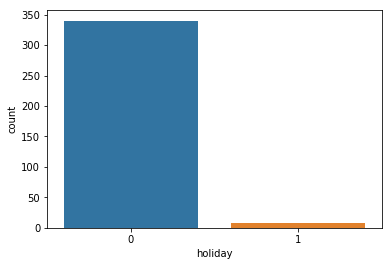

In [36]:
sns.countplot(trainData.holiday)
plt.xlabel("holiday")

Text(0.5,0,'weekday')

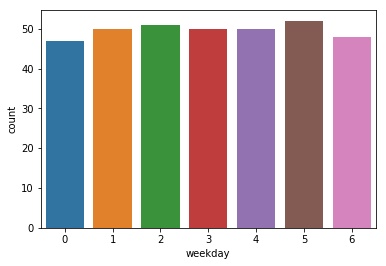

In [37]:
sns.countplot(trainData.weekday)
plt.xlabel("weekday")

Text(0.5,0,'workingday')

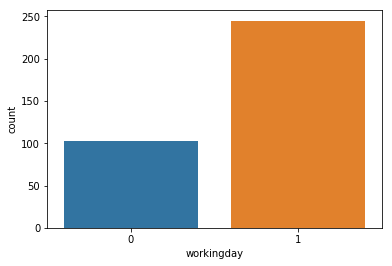

In [38]:
sns.countplot(trainData.workingday)
plt.xlabel("workingday")

In [39]:
# 获取所有的数据的特征名
cols=trainData.columns[2:] 
# print(cols)

# 舍弃记录号，日期两个特征，通常认为相关系数大于0.5的为强相关
data_corr = data[cols].drop('yr',axis=1).corr().abs()

In [40]:
cols = data_corr.columns

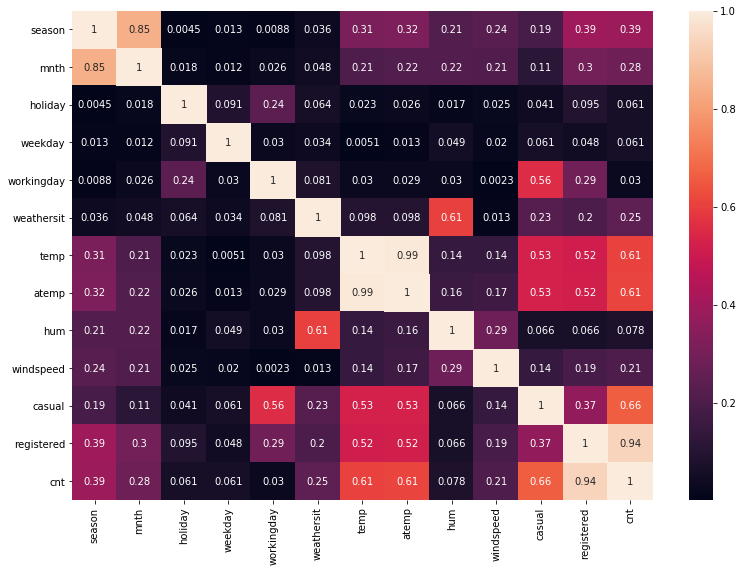

In [41]:
plt.subplots(figsize=(13, 9))
sns.heatmap(data_corr,annot=True)

# Mask unimportant features
sns.heatmap(data_corr, mask=data_corr < 1, cbar=False)

plt.savefig('bike_sharing_coor.png' )
plt.show()

In [42]:
#设置相关系数的阈值为0.5
threshold = 0.3
# 保存相关系数大于0.5的相关队列
corr_list = []
#size = data.shape[1]
size = data_corr.shape[0]

#Search for the highly correlated pairs
for i in range(0, size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

temp and atemp = 0.99
registered and cnt = 0.94
season and mnth = 0.85
casual and cnt = 0.66
atemp and cnt = 0.61
temp and cnt = 0.61
weathersit and hum = 0.61
workingday and casual = 0.56
atemp and casual = 0.53
temp and casual = 0.53
atemp and registered = 0.52
temp and registered = 0.52
season and registered = 0.39
season and cnt = 0.39
casual and registered = 0.37
season and atemp = 0.32
season and temp = 0.31


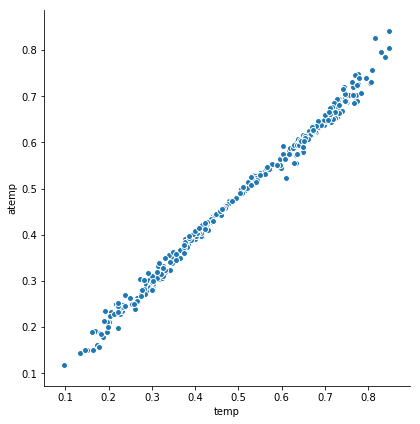

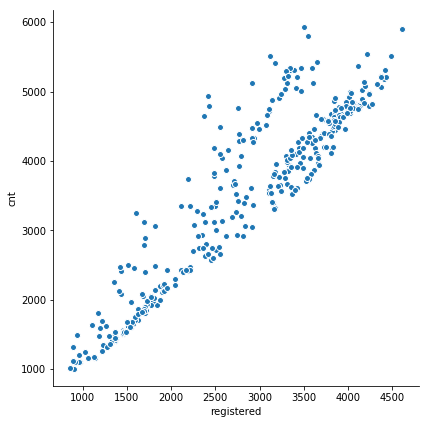

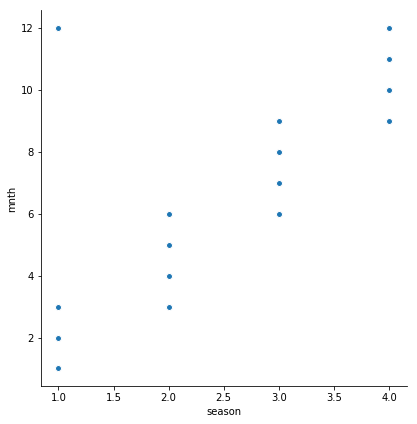

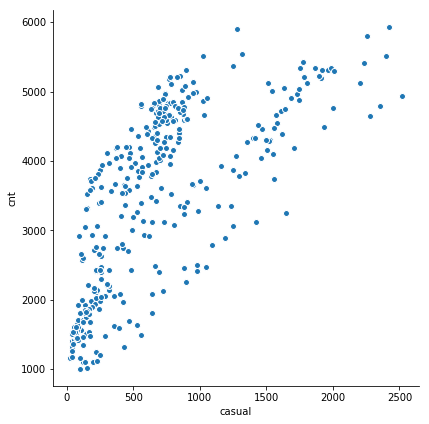

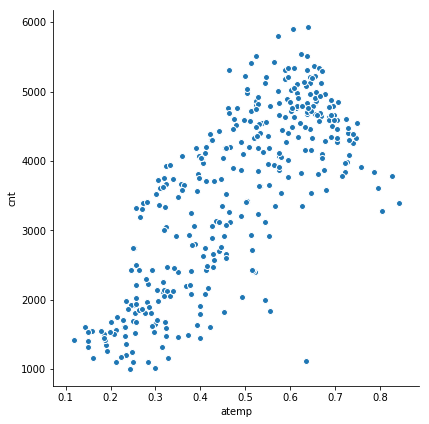

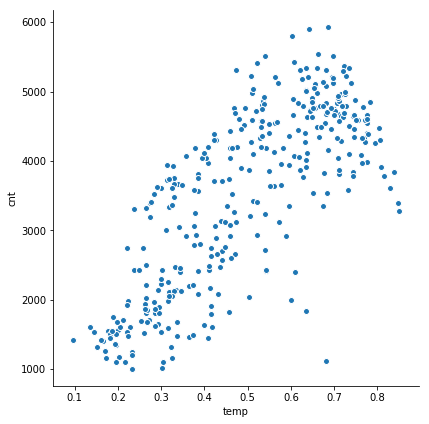

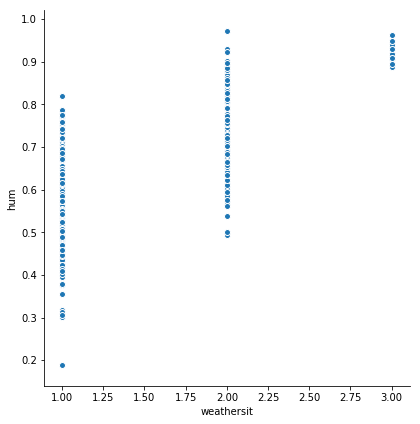

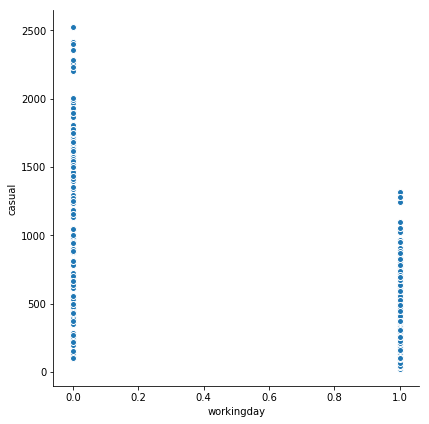

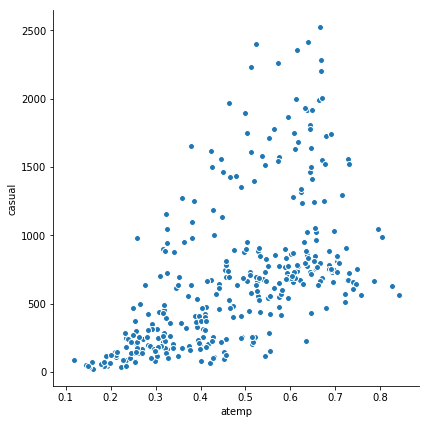

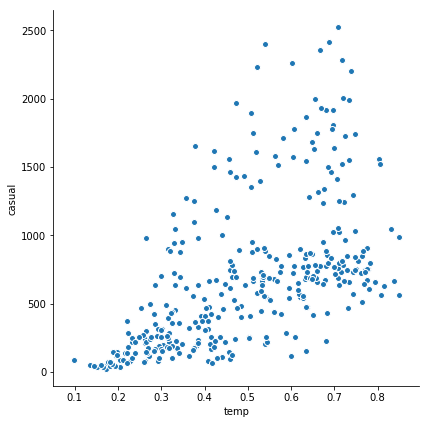

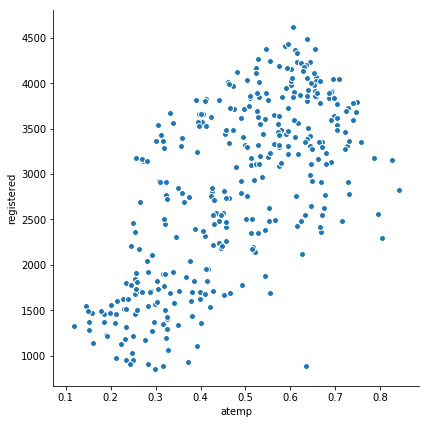

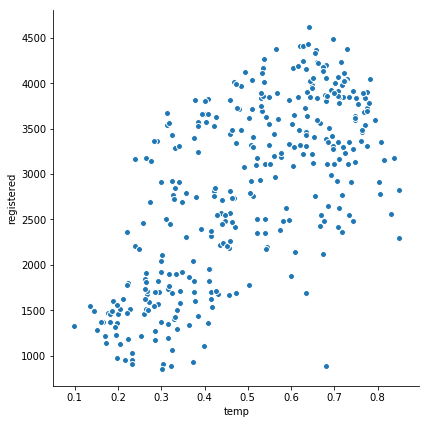

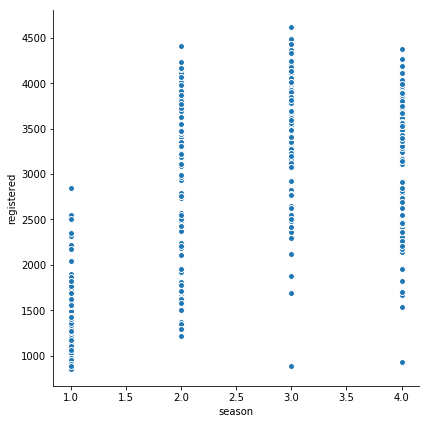

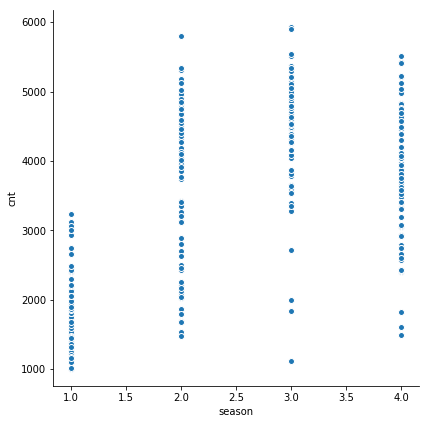

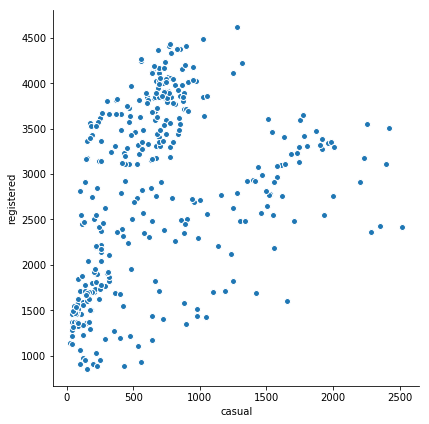

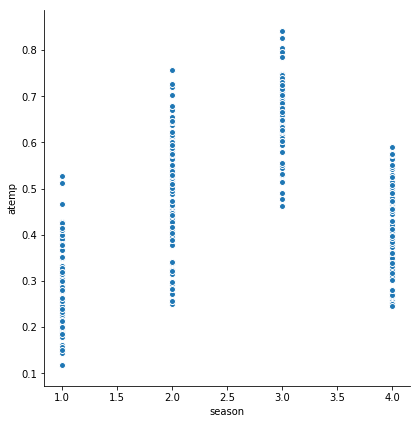

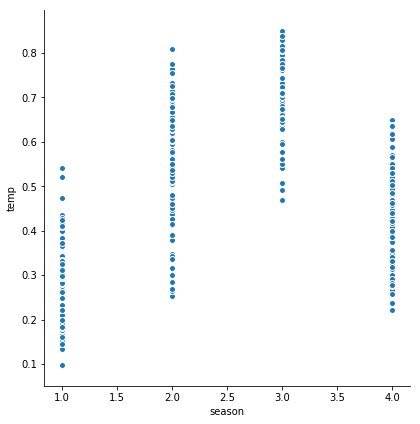

In [43]:
# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sns.pairplot(trainData, size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

根据相关系数情况可以验证得到如下结论(1)温度和体感温度相关系数为0.99，可判定为完全相关；(2) 温度对于共享单车的数目类似正相关；(3)温度对于注册用户和非注册用户个数影响无区别；(4)季节对于每日使用共享单车的数据有影响的

In [44]:
cols=trainData.columns
print(cols)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [47]:
# 对数据进行onehot编码
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit']
data_cate1 = pd.DataFrame()
for feature in categorical_features:
    data_cate2 = pd.get_dummies(data[feature],prefix = feature)
    data_cate1 = pd.concat([data_cate1,data_cate2],axis=1)
data_cate1.head()

,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
5,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
6,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [55]:
# 整合类别数据和数值数据
data_value = data[['temp','hum','windspeed','casual','registered','cnt']]
data1 = pd.concat([data['yr'],data_cate1,data_value],axis=1)
data1.head()

,yr,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,...,workingday_1,weathersit_1,weathersit_2,weathersit_3,temp,hum,windspeed,casual,registered,cnt
2,0,1,0,0,0,1,0,0,0,0,...,1,1,0,0,0.196364,0.437273,0.248309,120,1229,1349
3,0,1,0,0,0,1,0,0,0,0,...,1,1,0,0,0.200000,0.590435,0.160296,108,1454,1562
4,0,1,0,0,0,1,0,0,0,0,...,1,1,0,0,0.226957,0.436957,0.186900,82,1518,1600
5,0,1,0,0,0,1,0,0,0,0,...,1,1,0,0,0.204348,0.518261,0.089565,88,1518,1606
6,0,1,0,0,0,1,0,0,0,0,...,1,0,1,0,0.196522,0.498696,0.168726,148,1362,1510


In [60]:
data1.shape

(709, 37)

In [65]:
# 分割训练集和测试集
trainData = data1[data1.yr==0]
trainData.shape

(348, 37)

In [62]:
testData = data1[data1.yr==1]
testData.shape

(361, 37)

In [64]:
data1.columns

Index(['yr', 'season_1', 'season_2', 'season_3', 'season_4', 'mnth_1',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'holiday_0', 'holiday_1',
       'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'workingday_0', 'workingday_1',
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'temp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [67]:
data1.columns[1:-3]

Index(['season_1', 'season_2', 'season_3', 'season_4', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'holiday_0', 'holiday_1', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'workingday_0', 'workingday_1', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [69]:
x_trainData = trainData[data1.columns[1:-3]]
x_testData = testData[data1.columns[1:-3]]

y_casual_trainData = trainData['casual']
y_casual_testData = testData['casual']

y_reg_trainData = trainData['registered']
y_reg_testData = testData['registered']

y_cnt_trainData = trainData['cnt']
y_cnt_testData = testData['cnt']

#用于后续显示权重系数对应的特征
columns = x_trainData.columns

In [75]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

# 分别初始化对特征和目标值的标准化器
ss_X = StandardScaler()
ss_y = StandardScaler()

# 分别对训练和测试数据的特征以及目标值进行标准化处理
X_train = ss_X.fit_transform(x_trainData)
X_test = ss_X.transform(x_testData)
#对y做标准化不是必须
#对y标准化的好处是不同问题的w差异不太大，同时正则参数的范围也有限
y_cnt_train = ss_y.fit_transform(y_cnt_trainData.reshape(-1, 1))
y_cnt_test = ss_y.transform(y_cnt_testData.reshape(-1, 1))
y_casual_train = ss_y.fit_transform(y_casual_trainData.reshape(-1, 1))
y_casual_test = ss_y.transform(y_casual_testData.reshape(-1, 1))
y_reg_train = ss_y.fit_transform(y_reg_trainData.reshape(-1, 1))
y_reg_test = ss_y.transform(y_reg_testData.reshape(-1, 1))

G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  del sys.path[0]
G:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()
G:\Anaconda

### 线性回归-count of total rental bikes

In [76]:
print(np.mean(y_cnt_test)-np.mean(y_cnt_train))

1.6808989746348544


In [79]:
# 线性回归
#class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
from sklearn.linear_model import LinearRegression

# 使用默认配置初始化
lr = LinearRegression()

# 训练模型参数
lr.fit(X_train, y_cnt_train)

# 预测
y_cnt_test_pred_lr = lr.predict(X_test)+np.mean(y_cnt_test)-np.mean(y_cnt_train)
y_cnt_train_pred_lr = lr.predict(X_train)


# 看看各特征的权重系数，系数的绝对值大小可视为该特征的重要性
fs = pd.DataFrame({"columns":list(columns), "coef":list((lr.coef_.T))})
fs.sort_values(by=['coef'],ascending=False)

,coef,columns
25,[37185988064280.734],workingday_0
27,[9378148914574.316],weathersit_1
28,[9202758981151.959],weathersit_2
23,[8130305136296.828],weekday_5
20,[8065339081735.9375],weekday_2
22,[7999308612513.201],weekday_4
21,[7999308612513.199],weekday_3
19,[7999308612513.18],weekday_1
29,[3254449054134.383],weathersit_3
30,[0.4405517578125],temp


In [81]:
# 使用r2_score评价模型在测试集和训练集上的性能，并输出评估结果
#测试集
print ('The r2 score of LinearRegression on test is', r2_score(y_cnt_test, y_cnt_test_pred_lr))
#训练集
print ('The r2 score of LinearRegression on train is', r2_score(y_cnt_train, y_cnt_train_pred_lr))

The r2 score of LinearRegression on test is 0.6687573034913024
The r2 score of LinearRegression on train is 0.8279264775616012


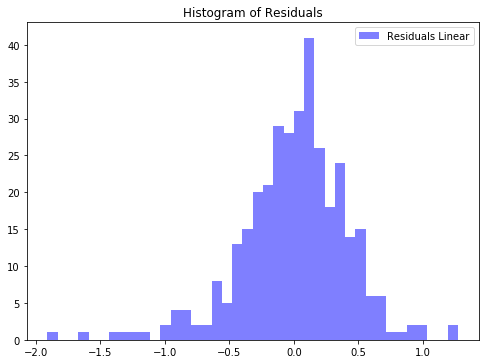

In [82]:
#在训练集上观察预测残差的分布，看是否符合模型假设：噪声为0均值的高斯噪声
f, ax = plt.subplots(figsize=(7, 5)) 
f.tight_layout() 
ax.hist(y_cnt_train - y_cnt_train_pred_lr,bins=40, label='Residuals Linear', color='b', alpha=.5); 
ax.set_title("Histogram of Residuals") 
ax.legend(loc='best');

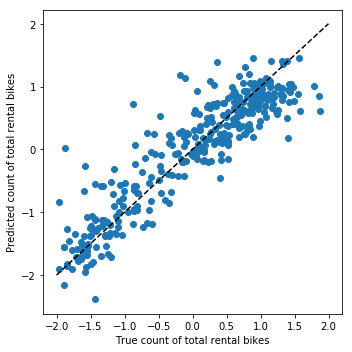

In [83]:
#还可以观察预测值与真值的散点图
plt.figure(figsize=(5, 5))
plt.scatter(y_cnt_train, y_cnt_train_pred_lr)
plt.plot([-2, 2], [-2, 2], '--k')   #数据已经标准化，3倍标准差即可
plt.axis('tight')
plt.xlabel('True count of total rental bikes')
plt.ylabel('Predicted count of total rental bikes')
plt.tight_layout()

残差分布和高斯分布比较符合，左侧残差超过-1.5有15个小于1000的数据点，散点图查看预测值和真实值有一定吻合度，但还是比较离散

### 线性回归-count of casual users

In [84]:
# 线性回归
#class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
from sklearn.linear_model import LinearRegression

# 使用默认配置初始化
lr = LinearRegression()

# 训练模型参数
lr.fit(X_train, y_casual_train)

# 预测
y_cal_test_pred_lr = lr.predict(X_test)+np.mean(y_casual_test)-np.mean(y_casual_train)
y_cal_train_pred_lr = lr.predict(X_train)


# 看看各特征的权重系数，系数的绝对值大小可视为该特征的重要性
fs = pd.DataFrame({"columns":list(columns), "coef":list((lr.coef_.T))})
fs.sort_values(by=['coef'],ascending=False)

,coef,columns
25,[81305690009963.08],workingday_0
27,[19618088999059.336],weathersit_1
28,[19251191932830.188],weathersit_2
23,[14812450874133.912],weekday_5
20,[14694090434330.234],weekday_2
19,[14573790757361.025],weekday_1
22,[14573790757361.014],weekday_4
21,[14573790757361.002],weekday_3
29,[6807960906623.541],weathersit_3
2,[3517246923.470088],season_3


In [85]:
# 使用r2_score评价模型在测试集和训练集上的性能，并输出评估结果
#测试集
print ('The r2 score of LinearRegression on test is', r2_score(y_casual_test, y_cal_test_pred_lr))
#训练集
print ('The r2 score of LinearRegression on train is', r2_score(y_casual_train, y_cal_train_pred_lr))

The r2 score of LinearRegression on test is 0.668495255384246
The r2 score of LinearRegression on train is 0.7781585941080378


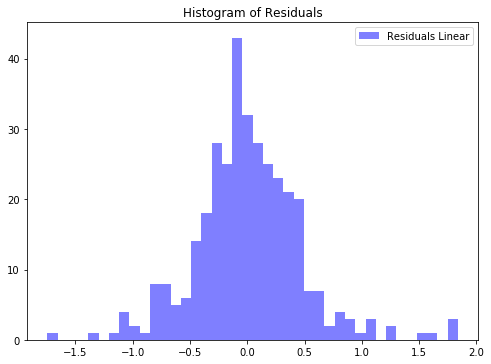

In [86]:
#在训练集上观察预测残差的分布，看是否符合模型假设：噪声为0均值的高斯噪声
f, ax = plt.subplots(figsize=(7, 5)) 
f.tight_layout() 
ax.hist(y_casual_train - y_cal_train_pred_lr,bins=40, label='Residuals Linear', color='b', alpha=.5); 
ax.set_title("Histogram of Residuals") 
ax.legend(loc='best');

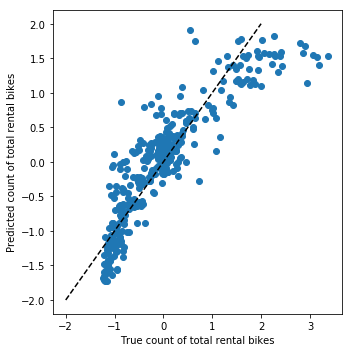

In [87]:
#还可以观察预测值与真值的散点图
plt.figure(figsize=(5, 5))
plt.scatter(y_casual_train, y_cal_train_pred_lr)
plt.plot([-2, 2], [-2, 2], '--k')   #数据已经标准化，3倍标准差即可
plt.axis('tight')
plt.xlabel('True count of total rental bikes')
plt.ylabel('Predicted count of total rental bikes')
plt.tight_layout()

### 线性回归-count of registered users

In [88]:
# 线性回归
#class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
from sklearn.linear_model import LinearRegression

# 使用默认配置初始化
lr = LinearRegression()

# 训练模型参数
lr.fit(X_train, y_reg_train)

# 预测
y_reg_test_pred_lr = lr.predict(X_test)+np.mean(y_reg_test)-np.mean(y_reg_train)
y_reg_train_pred_lr = lr.predict(X_train)


# 看看各特征的权重系数，系数的绝对值大小可视为该特征的重要性
fs = pd.DataFrame({"columns":list(columns), "coef":list((lr.coef_.T))})
fs.sort_values(by=['coef'],ascending=False)

,coef,columns
25,[3689781850912.435],workingday_0
23,[2432729748982.8525],weekday_5
20,[2413290767179.026],weekday_2
21,[2393533293858.5776],weekday_3
22,[2393533293858.5757],weekday_4
19,[2393533293858.538],weekday_1
27,[1417041933502.3027],weathersit_1
28,[1390540446626.9675],weathersit_2
29,[491748512650.15826],weathersit_3
8,[400849777481.5207],mnth_5


In [89]:
# 使用r2_score评价模型在测试集和训练集上的性能，并输出评估结果
#测试集
print ('The r2 score of LinearRegression on test is', r2_score(y_reg_test, y_reg_test_pred_lr))
#训练集
print ('The r2 score of LinearRegression on train is', r2_score(y_reg_train, y_reg_train_pred_lr))

The r2 score of LinearRegression on test is 0.6572554815967769
The r2 score of LinearRegression on train is 0.8369405343513062


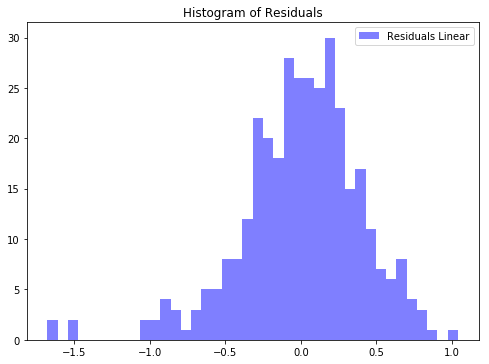

In [90]:
#在训练集上观察预测残差的分布，看是否符合模型假设：噪声为0均值的高斯噪声
f, ax = plt.subplots(figsize=(7, 5)) 
f.tight_layout() 
ax.hist(y_reg_train - y_reg_train_pred_lr,bins=40, label='Residuals Linear', color='b', alpha=.5); 
ax.set_title("Histogram of Residuals") 
ax.legend(loc='best');

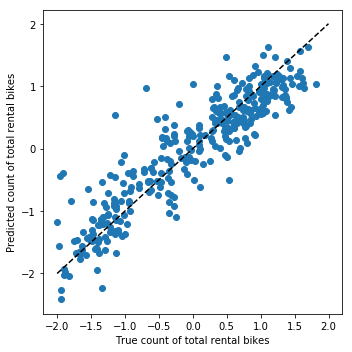

In [91]:
#还可以观察预测值与真值的散点图
plt.figure(figsize=(5, 5))
plt.scatter(y_reg_train, y_reg_train_pred_lr)
plt.plot([-2, 2], [-2, 2], '--k')   #数据已经标准化，3倍标准差即可
plt.axis('tight')
plt.xlabel('True count of total rental bikes')
plt.ylabel('Predicted count of total rental bikes')
plt.tight_layout()

In [94]:
#岭回归／L2正则
#class sklearn.linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, 
#                                  normalize=False, scoring=None, cv=None, gcv_mode=None, 
#                                  store_cv_values=False)
from sklearn.linear_model import  RidgeCV

#设置超参数（正则参数）范围
alphas = [ 0.01, 0.1, 1, 10,100]
#n_alphas = 20
#alphas = np.logspace(-5,2,n_alphas)

#生成一个RidgeCV实例
ridge = RidgeCV(alphas=alphas, store_cv_values=True)  

#模型训练
ridge.fit(X_train, y_cnt_train)    

#预测
y_cnt_test_pred_ridge = ridge.predict(X_test)+np.mean(y_cnt_test)-np.mean(y_cnt_train)
y_cnt_train_pred_ridge = ridge.predict(X_train)


# 评估，使用r2_score评价模型在测试集和训练集上的性能
print ('The r2 score of RidgeCV on test is', r2_score(y_cnt_test, y_cnt_test_pred_ridge))
print ('The r2 score of RidgeCV on train is', r2_score(y_cnt_train, y_cnt_train_pred_ridge))

The r2 score of RidgeCV on test is 0.6589661831346935
The r2 score of RidgeCV on train is 0.8289608059548356


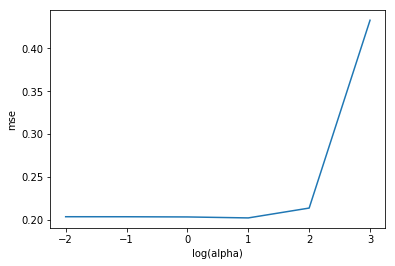

alpha is: 10.0


,coef_lr,coef_ridge,columns
25,[3689781850912.435],[-0.004047892568308731],workingday_0
23,[2432729748982.8525],[0.009812391409919796],weekday_5
20,[2413290767179.026],[0.0066330067012779215],weekday_2
21,[2393533293858.5776],[-0.012770241621465492],weekday_3
22,[2393533293858.5757],[-0.003734616876903296],weekday_4
19,[2393533293858.538],[-0.011458297702438572],weekday_1
27,[1417041933502.3027],[0.09370366454970458],weathersit_1
28,[1390540446626.9675],[-0.037401602407212686],weathersit_2
29,[491748512650.15826],[-0.1642579062182143],weathersit_3
8,[400849777481.5207],[0.18024305624653958],mnth_5


In [93]:
mse_mean = np.mean(ridge.cv_values_, axis = 0)
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas),1)) 

#这是为了标出最佳参数的位置，不是必须
#plt.plot(np.log10(ridge.alpha_)*np.ones(3), [0.28, 0.29, 0.30])

plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

print ('alpha is:', ridge.alpha_)

# 看看各特征的权重系数，系数的绝对值大小可视为该特征的重要性
fs = pd.DataFrame({"columns":list(columns), "coef_lr":list((lr.coef_.T)), "coef_ridge":list((ridge.coef_.T))})
fs.sort_values(by=['coef_lr'],ascending=False)

In [95]:
#岭回归／L2正则
#class sklearn.linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, 
#                                  normalize=False, scoring=None, cv=None, gcv_mode=None, 
#                                  store_cv_values=False)
from sklearn.linear_model import  RidgeCV

#设置超参数（正则参数）范围
alphas = [ 0.01, 0.1, 1, 10,100]
#n_alphas = 20
#alphas = np.logspace(-5,2,n_alphas)

#生成一个RidgeCV实例
ridge = RidgeCV(alphas=alphas, store_cv_values=True)  

#模型训练
ridge.fit(X_train, y_casual_train)    

#预测
y_casual_test_pred_ridge = ridge.predict(X_test)+np.mean(y_casual_test)-np.mean(y_casual_train)
y_casual_train_pred_ridge = ridge.predict(X_train)


# 评估，使用r2_score评价模型在测试集和训练集上的性能
print ('The r2 score of RidgeCV on test is', r2_score(y_casual_test, y_casual_test_pred_ridge))
print ('The r2 score of RidgeCV on train is', r2_score(y_casual_train, y_casual_train_pred_ridge))

The r2 score of RidgeCV on test is 0.6636022652634876
The r2 score of RidgeCV on train is 0.7856939422559025


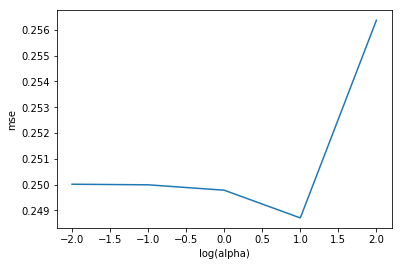

alpha is: 10.0


,coef_lr,coef_ridge,columns
25,[3689781850912.435],[0.18400919539851285],workingday_0
23,[2432729748982.8525],[0.003395217045147836],weekday_5
20,[2413290767179.026],[-0.06093740537281783],weekday_2
21,[2393533293858.5776],[-0.08988028912950725],weekday_3
22,[2393533293858.5757],[-0.0713969457863266],weekday_4
19,[2393533293858.538],[-0.02778037598799779],weekday_1
27,[1417041933502.3027],[0.059163666792832775],weathersit_1
28,[1390540446626.9675],[-0.03911364989606795],weathersit_2
29,[491748512650.15826],[-0.05988484729885901],weathersit_3
8,[400849777481.5207],[0.11260653173627666],mnth_5


In [96]:
mse_mean = np.mean(ridge.cv_values_, axis = 0)
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas),1)) 

#这是为了标出最佳参数的位置，不是必须
#plt.plot(np.log10(ridge.alpha_)*np.ones(3), [0.28, 0.29, 0.30])

plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

print ('alpha is:', ridge.alpha_)

# 看看各特征的权重系数，系数的绝对值大小可视为该特征的重要性
fs = pd.DataFrame({"columns":list(columns), "coef_lr":list((lr.coef_.T)), "coef_ridge":list((ridge.coef_.T))})
fs.sort_values(by=['coef_lr'],ascending=False)

In [97]:
#岭回归／L2正则
#class sklearn.linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, 
#                                  normalize=False, scoring=None, cv=None, gcv_mode=None, 
#                                  store_cv_values=False)
from sklearn.linear_model import  RidgeCV

#设置超参数（正则参数）范围
alphas = [ 0.01, 0.1, 1, 10,100]
#n_alphas = 20
#alphas = np.logspace(-5,2,n_alphas)

#生成一个RidgeCV实例
ridge = RidgeCV(alphas=alphas, store_cv_values=True)  

#模型训练
ridge.fit(X_train, y_reg_train)    

#预测
y_reg_test_pred_ridge = ridge.predict(X_test)+np.mean(y_reg_test)-np.mean(y_reg_train)
y_reg_train_pred_ridge = ridge.predict(X_train)


# 评估，使用r2_score评价模型在测试集和训练集上的性能
print ('The r2 score of RidgeCV on test is', r2_score(y_reg_test, y_reg_test_pred_ridge))
print ('The r2 score of RidgeCV on train is', r2_score(y_reg_train, y_reg_train_pred_ridge))

The r2 score of RidgeCV on test is 0.653518788606948
The r2 score of RidgeCV on train is 0.8364069077312721


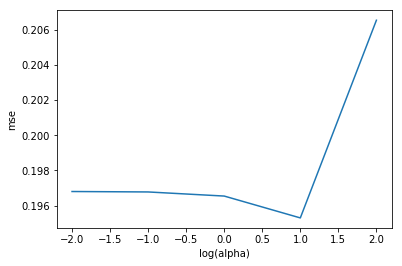

alpha is: 10.0


,coef_lr,coef_ridge,columns
25,[3689781850912.435],[-0.10619624520927895],workingday_0
23,[2432729748982.8525],[0.010880131581683855],weekday_5
20,[2413290767179.026],[0.042041426821099404],weekday_2
21,[2393533293858.5776],[0.032720737853264334],weekday_3
22,[2393533293858.5757],[0.034315442673352514],weekday_4
19,[2393533293858.538],[0.00035910871360222973],weekday_1
27,[1417041933502.3027],[0.08923112969367253],weathersit_1
28,[1390540446626.9675],[-0.027114528289069684],weathersit_2
29,[491748512650.15826],[-0.18045891749477272],weathersit_3
8,[400849777481.5207],[0.17229675293837282],mnth_5


In [98]:
mse_mean = np.mean(ridge.cv_values_, axis = 0)
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas),1)) 

#这是为了标出最佳参数的位置，不是必须
#plt.plot(np.log10(ridge.alpha_)*np.ones(3), [0.28, 0.29, 0.30])

plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

print ('alpha is:', ridge.alpha_)

# 看看各特征的权重系数，系数的绝对值大小可视为该特征的重要性
fs = pd.DataFrame({"columns":list(columns), "coef_lr":list((lr.coef_.T)), "coef_ridge":list((ridge.coef_.T))})
fs.sort_values(by=['coef_lr'],ascending=False)

In [100]:
#### Lasso／L1正则
# class sklearn.linear_model.LassoCV(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, 
#                                    normalize=False, precompute=’auto’, max_iter=1000, 
#                                    tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=1,
#                                    positive=False, random_state=None, selection=’cyclic’)
from sklearn.linear_model import LassoCV

# # 设置超参数搜索范围
# alphas = [ 0.001,0.01, 0.1, 1, 10,]

# # 生成一个LassoCV实例
# lasso = LassoCV(alphas=alphas,max_iter=2000)  
lasso = LassoCV()  

#训练（内含CV）
lasso.fit(X_train, y_cnt_train)  

#测试
y_cnt_test_pred_lasso = lasso.predict(X_test)+np.mean(y_cnt_test)-np.mean(y_cnt_train)
y_cnt_train_pred_lasso = lasso.predict(X_train)


# 评估，使用r2_score评价模型在测试集和训练集上的性能
print ('The r2 score of LassoCV on test is', r2_score(y_cnt_test, y_cnt_test_pred_lasso))
print ('The r2 score of LassoCV on train is', r2_score(y_cnt_train, y_cnt_train_pred_lasso))

The r2 score of LassoCV on test is 0.6628430681348874
The r2 score of LassoCV on train is 0.8292895547466582


G:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


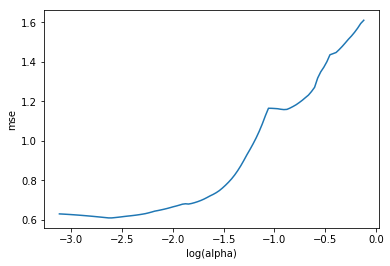

alpha is: 0.0023258408004641924


,coef_lasso,coef_lr,coef_ridge,columns
25,-0.000000e+00,[3689781850912.435],[-0.10619624520927895],workingday_0
23,1.337277e-02,[2432729748982.8525],[0.010880131581683855],weekday_5
20,7.669796e-03,[2413290767179.026],[0.042041426821099404],weekday_2
21,-6.935963e-03,[2393533293858.5776],[0.032720737853264334],weekday_3
22,-0.000000e+00,[2393533293858.5757],[0.034315442673352514],weekday_4
19,-6.547604e-03,[2393533293858.538],[0.00035910871360222973],weekday_1
27,1.251476e-01,[1417041933502.3027],[0.08923112969367253],weathersit_1
28,-0.000000e+00,[1390540446626.9675],[-0.027114528289069684],weathersit_2
29,-1.535844e-01,[491748512650.15826],[-0.18045891749477272],weathersit_3
8,1.918594e-01,[400849777481.5207],[0.17229675293837282],mnth_5


In [101]:
mses = np.mean(lasso.mse_path_, axis = 1)
plt.plot(np.log10(lasso.alphas_), mses) 
#plt.plot(np.log10(lasso.alphas_)*np.ones(3), [0.3, 0.4, 1.0])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()    
            
print ('alpha is:', lasso.alpha_)

# 看看各特征的权重系数，系数的绝对值大小可视为该特征的重要性
fs = pd.DataFrame({"columns":list(columns), "coef_lr":list((lr.coef_.T)), "coef_ridge":list((ridge.coef_.T)), "coef_lasso":list((lasso.coef_.T))})
fs.sort_values(by=['coef_lr'],ascending=False)

In [102]:
#### Lasso／L1正则
# class sklearn.linear_model.LassoCV(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, 
#                                    normalize=False, precompute=’auto’, max_iter=1000, 
#                                    tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=1,
#                                    positive=False, random_state=None, selection=’cyclic’)
from sklearn.linear_model import LassoCV

# # 设置超参数搜索范围
# alphas = [ 0.001,0.01, 0.1, 1, 10,]

# # 生成一个LassoCV实例
# lasso = LassoCV(alphas=alphas,max_iter=2000)  
lasso = LassoCV()  

#训练（内含CV）
lasso.fit(X_train, y_casual_train)  

#测试
y_casual_test_pred_lasso = lasso.predict(X_test)+np.mean(y_casual_test)-np.mean(y_casual_train)
y_casual_train_pred_lasso = lasso.predict(X_train)


# 评估，使用r2_score评价模型在测试集和训练集上的性能
print ('The r2 score of LassoCV on test is', r2_score(y_casual_test, y_casual_test_pred_lasso))
print ('The r2 score of LassoCV on train is', r2_score(y_casual_train, y_casual_train_pred_lasso))

The r2 score of LassoCV on test is 0.6648393506618464
The r2 score of LassoCV on train is 0.7859566018587396


G:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


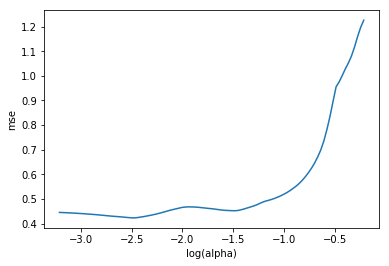

alpha is: 0.0032679709990722453


,coef_lasso,coef_lr,coef_ridge,columns
25,5.698530e-01,[3689781850912.435],[-0.10619624520927895],workingday_0
23,3.205028e-02,[2432729748982.8525],[0.010880131581683855],weekday_5
20,-3.023943e-02,[2413290767179.026],[0.042041426821099404],weekday_2
21,-5.974524e-02,[2393533293858.5776],[0.032720737853264334],weekday_3
22,-4.008722e-02,[2393533293858.5757],[0.034315442673352514],weekday_4
19,0.000000e+00,[2393533293858.538],[0.00035910871360222973],weekday_1
27,9.249460e-02,[1417041933502.3027],[0.08923112969367253],weathersit_1
28,-0.000000e+00,[1390540446626.9675],[-0.027114528289069684],weathersit_2
29,-4.338222e-02,[491748512650.15826],[-0.18045891749477272],weathersit_3
8,1.188389e-01,[400849777481.5207],[0.17229675293837282],mnth_5


In [103]:
mses = np.mean(lasso.mse_path_, axis = 1)
plt.plot(np.log10(lasso.alphas_), mses) 
#plt.plot(np.log10(lasso.alphas_)*np.ones(3), [0.3, 0.4, 1.0])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()    
            
print ('alpha is:', lasso.alpha_)

# 看看各特征的权重系数，系数的绝对值大小可视为该特征的重要性
fs = pd.DataFrame({"columns":list(columns), "coef_lr":list((lr.coef_.T)), "coef_ridge":list((ridge.coef_.T)), "coef_lasso":list((lasso.coef_.T))})
fs.sort_values(by=['coef_lr'],ascending=False)

In [104]:
#### Lasso／L1正则
# class sklearn.linear_model.LassoCV(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, 
#                                    normalize=False, precompute=’auto’, max_iter=1000, 
#                                    tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=1,
#                                    positive=False, random_state=None, selection=’cyclic’)
from sklearn.linear_model import LassoCV

# # 设置超参数搜索范围
# alphas = [ 0.001,0.01, 0.1, 1, 10,]

# # 生成一个LassoCV实例
# lasso = LassoCV(alphas=alphas,max_iter=2000)  
lasso = LassoCV()  

#训练（内含CV）
lasso.fit(X_train, y_reg_train)  

#测试
y_reg_test_pred_lasso = lasso.predict(X_test)+np.mean(y_reg_test)-np.mean(y_reg_train)
y_reg_train_pred_lasso = lasso.predict(X_train)


# 评估，使用r2_score评价模型在测试集和训练集上的性能
print ('The r2 score of LassoCV on test is', r2_score(y_reg_test, y_reg_test_pred_lasso))
print ('The r2 score of LassoCV on train is', r2_score(y_reg_train, y_reg_train_pred_lasso))

The r2 score of LassoCV on test is 0.6568982064867623
The r2 score of LassoCV on train is 0.8369625077411087


G:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


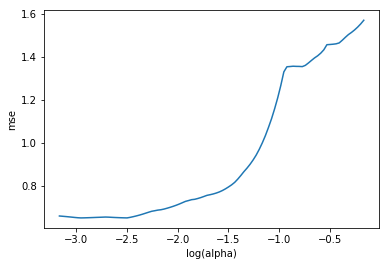

alpha is: 0.0011169720791805499


,coef_lasso,coef_lr,coef_ridge,columns
25,-3.166542e-01,[3689781850912.435],[-0.10619624520927895],workingday_0
23,-2.146029e-02,[2432729748982.8525],[0.010880131581683855],weekday_5
20,7.608638e-03,[2413290767179.026],[0.042041426821099404],weekday_2
21,0.000000e+00,[2393533293858.5776],[0.032720737853264334],weekday_3
22,8.360682e-04,[2393533293858.5757],[0.034315442673352514],weekday_4
19,-3.236130e-02,[2393533293858.538],[0.00035910871360222973],weekday_1
27,1.133906e-01,[1417041933502.3027],[0.08923112969367253],weathersit_1
28,-0.000000e+00,[1390540446626.9675],[-0.027114528289069684],weathersit_2
29,-1.734563e-01,[491748512650.15826],[-0.18045891749477272],weathersit_3
8,1.843645e-01,[400849777481.5207],[0.17229675293837282],mnth_5


In [105]:
mses = np.mean(lasso.mse_path_, axis = 1)
plt.plot(np.log10(lasso.alphas_), mses) 
#plt.plot(np.log10(lasso.alphas_)*np.ones(3), [0.3, 0.4, 1.0])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()    
            
print ('alpha is:', lasso.alpha_)

# 看看各特征的权重系数，系数的绝对值大小可视为该特征的重要性
fs = pd.DataFrame({"columns":list(columns), "coef_lr":list((lr.coef_.T)), "coef_ridge":list((ridge.coef_.T)), "coef_lasso":list((lasso.coef_.T))})
fs.sort_values(by=['coef_lr'],ascending=False)